# A02

## Part A

Our script for getting tweets is in twitter.py.

## Part B

In [1]:
import numpy as np
import pandas as pd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
tweets = pd.read_csv('tot_tweets.csv')

In [3]:
tweets = tweets.drop(columns=['id'])

In [4]:
tweets.shape

(5741, 2)

In [5]:
tweets.head()

,location,text
0,"Tennessee, USA","b""RT @AliAdair22: \xf0\x9f\x90\xa6Next, Beto O..."
1,NaN,"b""RT @AliAdair22: \xf0\x9f\x90\xa6Next, Beto O..."
2,NaN,"b""Ted Cruz, Beto O'Rourke try to rally Latino ..."
3,America,b'RT @RonNehring: Third poll now showing Cruz ...
4,West Texas,"b'Beto O\xe2\x80\x99Rourke, the Democratic con..."


#### Name replacement

In [6]:
# Let's write a function to take care of the names
def replace_names(text):
    
    text = text.lower()
    
    beto_words = ['@betoorourke' , '#betoorourke', '#betonbeto', '#betoforsenate', "beto o'rourke", "o'rourke", 'rourke', '#vetobeto', '#vetobetofortexas']
    cruz_words = ['@tedcruz', '#tedcruz', '#cruzcrew', '#choosecruz' 'ted cruz', 'ted']
    
    for w in beto_words:
        try:
            text = text.replace(w, 'beto')
        except:
            pass
    for w in cruz_words:
        try:
            text = text.replace(w, 'cruz')
        except:
            pass
    
    return text

In [7]:
# apply replace_names() on each tweet
text_column = []
for t in tweets.itertuples():
    text = t.text
    new_text = replace_names(text)
    text_column.append(new_text)

In [8]:
tweets.text = text_column

In [9]:
tweets.shape

(5741, 2)

In [10]:
# word frequency
# grab word frequency using nltk library
import nltk
# stop words
from nltk.corpus import stopwords

In [11]:
# put all tweets together
text=tweets["text"].values.tolist()
text=" ".join(text)
text = text.lower()

In [12]:
# tokenize the text 
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)

In [13]:
# let's do a word count
from collections import Counter

# counter object
words = Counter()

# update counter with new words
words.update(tokens)

In [14]:
# first order check
words.most_common()[:10]

[('xe2', 6577),
 ('x80', 6452),
 ('b', 5743),
 ('cruz', 5259),
 ('rt', 4791),
 ('the', 4411),
 ('xa6', 3838),
 ('beto', 3189),
 ('texas', 3134),
 ('in', 3112)]

In [15]:
# store the stop words
stopwords = stopwords.words('english')[:]

In [16]:
# lets do this again: remove stop words, single letter variable names
filter_words = Counter(x for x in tokens if x not in stopwords and x.isdigit() == False and len(x) != 1 and x.isalpha() == True)

In [17]:
filter_words.most_common()[:100]

[('cruz', 5259),
 ('rt', 4791),
 ('beto', 3189),
 ('texas', 3134),
 ('senate', 3003),
 ('https', 2088),
 ('co', 2007),
 ('race', 1956),
 ('vote', 877),
 ('single', 785),
 ('msnbc', 735),
 ('word', 722),
 ('win', 703),
 ('every', 662),
 ('care', 656),
 ('repeal', 652),
 ('act', 652),
 ('pre', 652),
 ('insiscruz', 651),
 ('affordable', 651),
 ('including', 651),
 ('protections', 651),
 ('existing', 650),
 ('condi', 650),
 ('debate', 502),
 ('nplease', 491),
 ('believe', 487),
 ('retweet', 483),
 ('sample', 483),
 ('bigger', 479),
 ('size', 478),
 ('guy', 401),
 ('leads', 352),
 ('show', 345),
 ('skateboard', 343),
 ('still', 337),
 ('side', 336),
 ('election', 334),
 ('polling', 331),
 ('skates', 327),
 ('across', 327),
 ('stage', 327),
 ('hoping', 327),
 ('dont', 327),
 ('history', 319),
 ('texassenate', 301),
 ('million', 289),
 ('want', 256),
 ('looking', 241),
 ('cbsnews', 238),
 ('ahead', 237),
 ('problem', 237),
 ('integrity', 235),
 ('serious', 232),
 ('becaus', 232),
 ('campaign'

In [18]:
pd.set_option('display.max_colwidth', -1)

In [19]:
# lets search for issues
tweets[tweets['text'].str.contains("")]

,location,text
0,"Tennessee, USA","b""rt @aliadair22: \xf0\x9f\x90\xa6next, beto beto, running for u.s. senate in #texas. please follow, tweet, contribute, volunteer, anything\xe2\x80\xa6"""
1,NaN,"b""rt @aliadair22: \xf0\x9f\x90\xa6next, beto beto, running for u.s. senate in #texas. please follow, tweet, contribute, volunteer, anything\xe2\x80\xa6"""
2,NaN,"b""cruz cruz, beto try to rally latino voters in texas senate race https://t.co/ehvo0zz7yh #foxnews @mriverafoxnews"""
3,America,b'rt @ronnehring: third poll now showing cruz with 8 or 9 point solid lead over beto o\xe2\x80\x99beto (d-hollywood). follows quinnipiac and ny times\xe2\x80\xa6'
4,West Texas,"b'beto o\xe2\x80\x99beto, the democratic congressman from el paso, has made the texas race for us senate one of the most widel\xe2\x80\xa6 https://t.co/f9i3qqej6u'"
5,"Dallas, TX",b'rt @wfaa: does texas\xe2\x80\x99 senate race belong to texans? https://t.co/ccbbwh5pmt https://t.co/gxnrzdjhid'
6,NaN,"b""rt @lizlogan76: beto could win this, because of aca alone. this is the winning issue, get the word out, vote for beto if you valu\xe2\x80\xa6"""
7,"Atlanta, GA","b""rt @foxnews: cruz cruz, beto try to rally latino voters in the texas senate race. https://t.co/ynxbe6uvpb"""
8,Oregon,"b""rt @patriot_musket: lots of really good news for house and senate republicans in this weekend's and today's polls. \n\nand lol that cook stil\xe2\x80\xa6"""
9,Australia,"b""rt @amhotflash: beto's campaign has raised more money in a single quarter, than any senate race in the history of this country. #beto is ma\xe2\x80\xa6"""


In [20]:
# Let's write a function to take care of the ISSUES
def replace_issues(text):
    
    text = text.lower()
    
    healthcare = ['affordable care act' , "healthcare", "aca"]
    taxes = ['tax', 'taxes']
    climatechange = ['climate', 'climatechange']
    bordercontrol = ['border', 'immigration', 'bordersecurity', 'borders']
    character = ['lyin', 'leader']
    
    for w in healthcare:
        try:
            text = text.replace(w, ' healthcare ')
        except:
            pass
    for w in taxes:
        try:
            text = text.replace(w, ' taxes ')
        except:
            pass
    for w in climatechange:
        try:
            text = text.replace(w, ' climatechange ')
        except:
            pass
    for w in bordercontrol:
        try:
            text = text.replace(w, ' bordercontrol ')
        except:
            pass

    for w in character:
        try:
            text = text.replace(w, ' character ')
        except:
            pass
    
    return text

In [21]:
# apply replace_issues() on each tweet
text_column = []
for t in tweets.itertuples():
    text = t.text
    new_text = replace_issues(text)
    text_column.append(new_text)

In [22]:
# replace old text with new text
tweets.text = text_column

In [23]:
# do another word count
# put all tweets together
text=tweets["text"].values.tolist()
text=" ".join(text)
text = text.lower()

# tokenize the text 
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)

# counter object
words = Counter()

# update counter with new words
words.update(tokens)

In [24]:
# issues
issues = ['healthcare', 'taxes', 'climatechange', 'bordercontrol', 'character']

In [25]:
# lets do this again: remove stop words, single letter variable names
filter_words = Counter(x for x in tokens if x not in stopwords and x.isdigit() == False and len(x) != 1 and x.isalpha() == True and x in issues)

In [26]:
filter_words.most_common()[:]

[('healthcare', 730),
 ('character', 289),
 ('taxes', 196),
 ('bordercontrol', 64),
 ('climatechange', 36)]

Issues:
* healthcare
* character
* taxes
* bordercontrol

## Part C

#### Calculate Lift for Candidate / Issue

Get count of tweets mentioning Beto / Cruz, and count of all tweets with Beto and/or Cruz in it

In [27]:
beto_count = 0
cruz_count = 0
n_tweets = 0
for t in tweets.itertuples():
    if 'beto' in t.text and 'cruz' in t.text:
        beto_count += 1
        cruz_count += 1
        n_tweets += 1
    elif 'beto' in t.text:
        beto_count += 1
        n_tweets += 1
    elif 'cruz' in t.text:
        cruz_count += 1        
        n_tweets += 1

Get count of tweets for each issue!

In [28]:
healthcare_count = 0
character_count = 0
taxes_count = 0
bordercontrol_count = 0
for t in tweets.itertuples():
    if 'healthcare' in t.text:
        healthcare_count += 1
    elif 'character' in t.text:
        character_count += 1
    elif 'taxes' in t.text:
        taxes_count += 1
    elif 'bordercontrol' in t.text:
        bordercontrol_count += 1

Get count of tweets with 

Beto/healthcare, Beto/character, Beto/taxes, Beto/bordercontrol


Cruz/healthcare, Cruz/character, Cruz/taxes, Cruz/bordercontrol

In [29]:
# beto and issues
bh_count = 0
bc_count = 0
bt_count = 0
bb_count = 0

# cruz and issues
ch_count = 0
cc_count = 0
ct_count = 0
cb_count = 0

for t in tweets.itertuples():
    # beto
    if 'beto' in t.text and 'healthcare' in t.text:
        bh_count += 1
    if 'beto' in t.text and 'character' in t.text:
        bc_count += 1
    if 'beto' in t.text and 'taxes' in t.text:
        bt_count += 1
    if 'beto' in t.text and 'bordercontrol' in t.text:
        bb_count += 1
    
    # cruz
    if 'cruz' in t.text and 'healthcare' in t.text:
        ch_count += 1
    if 'cruz' in t.text and 'character' in t.text:
        cc_count += 1
    if 'cruz' in t.text and 'taxes' in t.text:
        ct_count += 1
    if 'cruz' in t.text and 'bordercontrol' in t.text:
        cb_count += 1

In [30]:
candidate_counts = [beto_count, cruz_count]
issue_counts = [healthcare_count, character_count, taxes_count, bordercontrol_count]
combo_counts = [bh_count, bc_count, bt_count, bb_count, ch_count, cc_count, ct_count, cb_count]
lifts = [] # order: [0] beto vs healthcare, [1] beto vs character, [2] beto vs taxes, [3] beto vs bordercontrol
           #        [4] cruz vs healthcare, [5] cruz vs character, [6] cruz vs taxes, [7] cruz vs bordercontrol
index = 0
for cand_count in candidate_counts:
    for issue_count in issue_counts:
        lifts.append( (len(tweets) * combo_counts[index]) / (cand_count * issue_count) )
        index +=1 
lifts_copy = lifts[:]

In [31]:
lifts = np.reshape(lifts, (2, 4)).T # reshape for similarities matrix

In [32]:
similarities = pd.DataFrame(lifts, columns=['beto', 'cruz'], index=['healthcare', 'character', 'taxes', 'bordercontrol'])

In [33]:
similarities

,beto,cruz
healthcare,0.171859,1.546513
character,1.674005,0.524548
taxes,1.275317,1.225257
bordercontrol,0.412301,1.088287


## Sentiment Analysis

In [34]:
# ask if key word in the string
# split into list
# identify the index of the key word
# get list of +/- 3 indexes from key word
# concated list back to string
# return string
def get_substring(key_word, s):
    """
        1. ask if key word in the string
        2. split into list
        3. identify the index of the key word
        4. get list of +/- radius indexes from key word
        5. concated list back to string
        6. return string
    """

    # get rid of "b'" at beginning of tweet
    s = s[2:]

    # get rid of rt stuff if there
    if 'rt @' in s:
        end_of_rt = s.index(':')+2
        s = s[end_of_rt:]

    s_list = s.split()

    radius = 8 # set the radius

    # using this ugly mess to try to get beto or cruz if they are next to commas or exclamation
    try:
        kw_index = s_list.index(key_word)
    except:
        try:
            kw_index = s_list.index(key_word+',')
        except:
            try:
                kw_index = s_list.index(key_word+'!')
            except:
                try:
                    kw_index = s_list.index(key_word+'.')
                except:
                    return

    # get up until key word
    sub_s_beg = []
    if radius > kw_index:
        sub_s_beg = s_list[:kw_index]
    else:
        sub_s_beg = s_list[kw_index-radius:kw_index]

    # get key word and after
    len_kw_index_to_end = len(s_list[kw_index+1:])
    sub_s_end = []
    if radius < len_kw_index_to_end:
        sub_s_end = s_list[kw_index:kw_index+radius+1]
    else:
        sub_s_end = s_list[kw_index:]

    sub_s = (' ').join(sub_s_beg + sub_s_end)
    return sub_s

In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [36]:
# sentiment analyzer object
analyser = SentimentIntensityAnalyzer()

In [37]:
# lyft values > 1
ch_sent = []
ct_sent = []
cb_sent = []
bc_sent = []
bt_sent = []

for t in tweets.itertuples():
    
    # Beto and taxes
    if 'beto' in t.text and 'taxes' in t.text:
        sub_text = get_substring('beto', t.text)
        if sub_text:
            snt = analyser.polarity_scores(sub_text)
            bt_sent.append(snt['compound'])
        
    # Beto and character
    if 'beto' in t.text and 'character' in t.text:
        sub_text = get_substring('beto', t.text)
        
        if sub_text:
            snt = analyser.polarity_scores(sub_text)
            bc_sent.append(snt['compound'])

    # cruz and taxes
    if 'cruz' in t.text and 'taxes' in t.text:
        sub_text = get_substring('cruz', t.text)
        if sub_text:
            snt = analyser.polarity_scores(sub_text)
            ct_sent.append(snt['compound'])
            
    # cruz and bordercontrol
    if 'cruz' in t.text and 'bordercontrol' in t.text:
        sub_text = get_substring('cruz', t.text)
        if sub_text:
            snt = analyser.polarity_scores(sub_text)
            cb_sent.append(snt['compound'])

    # cruz and healthcare
    if 'cruz' in t.text and 'healthcare' in t.text:
        sub_text = get_substring('cruz', t.text)
        if sub_text:
            snt = analyser.polarity_scores(sub_text)
            ch_sent.append(snt['compound'])

In [38]:
# get average of list
def avg(lst): 
    return sum(lst) / len(lst)

In [39]:
# order [0] beto/big [1] cruz/big [2] beto/small [3] cruz/small
sentiments = [avg(ch_sent), avg(ct_sent), avg(cb_sent), avg(bc_sent), avg(bt_sent)]

In [40]:
sentiments

[0.0, 0.07625853658536597, 0.3294, 0.5294886363636357, 0.254]

In [41]:
final_table = pd.DataFrame(None, columns=['lift', 'sentiment score'], index=['healthcare & beto', 'character& beto', 'taxes & beto', 'bordercontrol & beto',
                                                                             'healthcare & cruz','character& cruz','taxes & cruz','bordercontrol & cruz'])

In [42]:
final_table['lift']=lifts_copy

In [43]:
final_table['sentiment score']['healthcare & cruz']= sentiments[0]
final_table['sentiment score']['taxes & cruz']= sentiments[1]
final_table['sentiment score']['bordercontrol & cruz']= sentiments[2]
final_table['sentiment score']['character& beto']= sentiments[3]
final_table['sentiment score']['taxes & beto']= sentiments[4]


/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Librar

In [44]:
final_table

,lift,sentiment score
healthcare & beto,0.171859,NaN
character& beto,1.674005,0.529489
taxes & beto,1.275317,0.254
bordercontrol & beto,0.412301,NaN
healthcare & cruz,1.546513,0
character& cruz,0.524548,NaN
taxes & cruz,1.225257,0.0762585
bordercontrol & cruz,1.088287,0.3294


## Task D

### Get dissimilarity matrix

In [45]:
attri_list=["beto","cruz","healthcare","character","taxes","bordercontrol"]

In [46]:
attri_combos = []
for i in range (len(attri_list)):
    for j in range (len(attri_list)):
        combo = (attri_list[i], attri_list[j])
        attri_combos.append(combo)

In [47]:
attri_combos 

[('beto', 'beto'),
 ('beto', 'cruz'),
 ('beto', 'healthcare'),
 ('beto', 'character'),
 ('beto', 'taxes'),
 ('beto', 'bordercontrol'),
 ('cruz', 'beto'),
 ('cruz', 'cruz'),
 ('cruz', 'healthcare'),
 ('cruz', 'character'),
 ('cruz', 'taxes'),
 ('cruz', 'bordercontrol'),
 ('healthcare', 'beto'),
 ('healthcare', 'cruz'),
 ('healthcare', 'healthcare'),
 ('healthcare', 'character'),
 ('healthcare', 'taxes'),
 ('healthcare', 'bordercontrol'),
 ('character', 'beto'),
 ('character', 'cruz'),
 ('character', 'healthcare'),
 ('character', 'character'),
 ('character', 'taxes'),
 ('character', 'bordercontrol'),
 ('taxes', 'beto'),
 ('taxes', 'cruz'),
 ('taxes', 'healthcare'),
 ('taxes', 'character'),
 ('taxes', 'taxes'),
 ('taxes', 'bordercontrol'),
 ('bordercontrol', 'beto'),
 ('bordercontrol', 'cruz'),
 ('bordercontrol', 'healthcare'),
 ('bordercontrol', 'character'),
 ('bordercontrol', 'taxes'),
 ('bordercontrol', 'bordercontrol')]

In [48]:
attri_combo_dict = {}
for a in attri_combos:
    attri_combo_dict[a] = 0

In [49]:
for a in attri_combos:
    for c in tweets["text"]:
        attri1 = a[0]
        attri2 = a[1]
        if attri1 in c and attri2 in c:
            attri_combo_dict[a] += 1

In [50]:
attri_combo_dict

{('beto', 'beto'): 3249,
 ('beto', 'cruz'): 1913,
 ('beto', 'healthcare'): 71,
 ('beto', 'character'): 270,
 ('beto', 'taxes'): 83,
 ('beto', 'bordercontrol'): 14,
 ('cruz', 'beto'): 1913,
 ('cruz', 'cruz'): 3341,
 ('cruz', 'healthcare'): 657,
 ('cruz', 'character'): 87,
 ('cruz', 'taxes'): 82,
 ('cruz', 'bordercontrol'): 38,
 ('healthcare', 'beto'): 71,
 ('healthcare', 'cruz'): 657,
 ('healthcare', 'healthcare'): 730,
 ('healthcare', 'character'): 4,
 ('healthcare', 'taxes'): 0,
 ('healthcare', 'bordercontrol'): 0,
 ('character', 'beto'): 270,
 ('character', 'cruz'): 87,
 ('character', 'healthcare'): 4,
 ('character', 'character'): 289,
 ('character', 'taxes'): 0,
 ('character', 'bordercontrol'): 0,
 ('taxes', 'beto'): 83,
 ('taxes', 'cruz'): 82,
 ('taxes', 'healthcare'): 0,
 ('taxes', 'character'): 0,
 ('taxes', 'taxes'): 115,
 ('taxes', 'bordercontrol'): 1,
 ('bordercontrol', 'beto'): 14,
 ('bordercontrol', 'cruz'): 38,
 ('bordercontrol', 'healthcare'): 0,
 ('bordercontrol', 'charac

In [51]:
attri_dict = {}
for b in attri_list:
    for c in tweets["text"]:
        if b in c:
            if b in attri_dict:
                attri_dict[b] += 1
            else:
                attri_dict[b] = 1

In [52]:
attri_dict

{'beto': 3249,
 'cruz': 3341,
 'healthcare': 730,
 'character': 289,
 'taxes': 115,
 'bordercontrol': 61}

In [53]:
tot_number_of_tweets=n_tweets

In [54]:
tot_number_of_tweets=len(tweets)

In [55]:
tot_number_of_tweets

5741

In [56]:
lifts_dict = {}
for a in attri_combo_dict:
    if a[0] == a[1]:
        lift = 0
    else:
        combo_count = attri_combo_dict[a]
        attri1_count = attri_dict[a[0]]
        attri2_count = attri_dict[a[1]]
        lift = (tot_number_of_tweets * combo_count) / (attri1_count * attri2_count)
    lifts_dict[a] = lift

In [57]:
matrix = []
row = -1
current_attri = ''
for combo in lifts_dict:
    attri = combo[0]
    lift = lifts_dict[combo]
    if attri == current_attri:
        matrix[row].append(lift)
    else:
        row += 1
        current_attri = attri
        matrix.append([])
        matrix[row].append(lift)

In [58]:
simi = pd.DataFrame(matrix, columns=attri_list, index=attri_list)

In [59]:
simi

,beto,cruz,healthcare,character,taxes,bordercontrol
beto,0.000000,1.011757,0.171859,1.650835,1.275317,0.405542
cruz,1.011757,0.000000,1.546513,0.517288,1.225257,1.070446
healthcare,0.171859,1.546513,0.000000,0.108850,0.000000,0.000000
character,1.650835,0.517288,0.108850,0.000000,0.000000,0.000000
taxes,1.275317,1.225257,0.000000,0.000000,0.000000,0.818389
bordercontrol,0.405542,1.070446,0.000000,0.000000,0.818389,0.000000


In [60]:
#dissimilarity
dis=matrix
for i in range (len(matrix)):
    for j in range (len(matrix[i])):
        if matrix[i][j] != 0:
            dis[i][j] = 1/matrix[i][j]

In [61]:
dissimilarity = pd.DataFrame(dis, columns=attri_list, index=attri_list)

In [62]:
dissimilarity

,beto,cruz,healthcare,character,taxes,bordercontrol
beto,0.000000,0.988379,5.818710,0.605754,0.784119,2.465835
cruz,0.988379,0.000000,0.646616,1.933159,0.816156,0.934190
healthcare,5.818710,0.646616,0.000000,9.186988,0.000000,0.000000
character,0.605754,1.933159,9.186988,0.000000,0.000000,0.000000
taxes,0.784119,0.816156,0.000000,0.000000,0.000000,1.221913
bordercontrol,2.465835,0.934190,0.000000,0.000000,1.221913,0.000000


### Plot MDS Map

In [63]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [64]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dis).embedding_

In [65]:
dissimilarity = dissimilarity.max() / similarities * 100
dissimilarity[np.isinf(dissimilarity)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)

values = np.abs(dissimilarity)

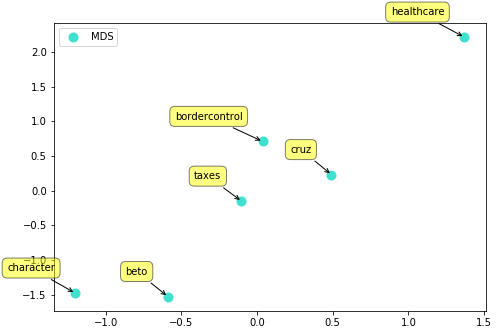

In [66]:
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100

plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

for label, x, y in zip(attri_list, pos[:, 0], pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

## Task E

#### City stuff

In [67]:
# Let's get a list of what we'll consider big cities/towns in Texas.
large_cities = open('large_cities.txt', 'r')
cities = []
for line in large_cities:
    l = line.strip()
    l_list = l.split()
    if l_list[2].isalpha():
        city = l_list[1] + ' ' + l_list[2]
    else:
        city = l_list[1]
    cities.append(city)
cities = cities[0:11]
print (cities)

['Houston', 'San Antonio', 'Dallas', 'Austin', 'Fort Worth', 'El Paso', 'Arlington', 'Corpus Christi', 'Plano', 'Laredo', 'Lubbock']


In [68]:
# get column for location that is either Big, Small, or none
location_column = []
for t in tweets.itertuples():
    if type(t.location) == str:
        for c in cities:
            if c in t.location:
                location_column.append('Big')
                break
            elif c == cities[-1] and (', TX' in t.location or ', Texas' in t.location):
                location_column.append('Small')
                break
            elif c == cities[-1]:
                location_column.append('none')
                break
    else:
        location_column.append('none')

In [69]:
# replace old location column with new
tweets.location = location_column

In [70]:
tweets.shape

(5741, 2)

In [71]:
tweets.head(6)

,location,text
0,none,"b""rt @aliadair22: \xf0\x9f\x90\xa6next, beto beto, running for u.s. senate in #texas. please follow, tweet, contribute, volunteer, anything\xe2\x80\xa6"""
1,none,"b""rt @aliadair22: \xf0\x9f\x90\xa6next, beto beto, running for u.s. senate in #texas. please follow, tweet, contribute, volunteer, anything\xe2\x80\xa6"""
2,none,"b""cruz cruz, beto try to rally latino voters in texas senate race https://t.co/ehvo0zz7yh #foxnews @mriverafoxnews"""
3,none,b'rt @ronnehring: third poll now showing cruz with 8 or 9 point solid lead over beto o\xe2\x80\x99beto (d-hollywood). follows quinnipiac and ny times\xe2\x80\xa6'
4,none,"b'beto o\xe2\x80\x99beto, the democratic congressman from el paso, has made the texas race for us senate one of the most widel\xe2\x80\xa6 https://t.co/f9i3qqej6u'"
5,Big,b'rt @wfaa: does texas\xe2\x80\x99 senate race belong to texans? https://t.co/ccbbwh5pmt https://t.co/gxnrzdjhid'


#### Calculate Lift for Candidate / City size

Get count of tweets mentioning Beto / Cruz, and count of all tweets with Beto and/or Cruz in it

In [72]:
beto_count = 0
cruz_count = 0
n_tweets = 0
for t in tweets.itertuples():
    if t.location != 'none':
        if 'beto' in t.text and 'cruz' in t.text:
            beto_count += 1
            cruz_count += 1
            n_tweets += 1
        elif 'beto' in t.text:
            beto_count += 1
            n_tweets += 1
        elif 'cruz' in t.text:
            cruz_count += 1        
            n_tweets += 1

Get count of tweets from large / small cities in Texas

In [73]:
big_city_count = 0
small_city_count = 0
for t in tweets.itertuples():
    if t.location == 'Big':
        big_city_count += 1
    elif t.location == 'Small':
        small_city_count += 1

Get count of tweets with Beto/Big, Beto/Small, Cruz/Big, Cruz/Big

In [74]:
bb_count = 0
bs_count = 0
cb_count = 0
cs_count = 0
for t in tweets.itertuples():
    if 'beto' in t.text and t.location == 'Big':
        bb_count += 1
    if 'beto' in t.text and t.location == 'Small':
        bs_count += 1
    if 'cruz' in t.text and t.location == 'Big':
        cb_count += 1
    if 'cruz' in t.text and t.location == 'Small':
        cs_count += 1

Calculate lift Beto/Big, Beto/Small, Cruz/Big, Cruz/Big

In [75]:
candidate_counts = [beto_count, cruz_count]
city_counts = [big_city_count, small_city_count]
combo_counts = [bb_count, bs_count, cb_count, cs_count]
lifts = [] # order: [0] beto vs big, [1] beto vs small, [2] cruz vs big, [3] cruz vs small
i = 0
for cand_count in candidate_counts:
    for city_count in city_counts:
        lifts.append( (n_tweets * combo_counts[i]) / (cand_count * city_count) )
        i+=1

In [76]:
lifts = np.reshape(lifts, (2, 2)).T # reshape for similarities matrix

In [77]:
similarities = pd.DataFrame(lifts, columns=['beto', 'cruz'], index=['big city', 'small city'])

#### <i>Lift Matrix<i>

In [78]:
similarities

,beto,cruz
big city,0.779859,0.796016
small city,0.773519,0.733456


#### Start sentimental stuff :)

Define <i>get_substring(key_word, s)<i>

In [79]:
# ask if key word in the string
# split into list
# identify the index of the key word
# get list of +/- 3 indexes from key word
# concated list back to string
# return string
def get_substring(key_word, s):
    """
        1. ask if key word in the string
        2. split into list
        3. identify the index of the key word
        4. get list of +/- radius indexes from key word
        5. concated list back to string
        6. return string
    """

    # get rid of "b'" at beginning of tweet
    s = s[2:]

    # get rid of rt stuff if there
    if 'rt @' in s:
        end_of_rt = s.index(':')+2
        s = s[end_of_rt:]

    s_list = s.split()

    radius = 5 # set the radius

    # using this ugly mess to try to get beto or cruz if they are next to commas or exclamation
    try:
        kw_index = s_list.index(key_word)
    except:
        try:
            kw_index = s_list.index(key_word+',')
        except:
            try:
                kw_index = s_list.index(key_word+'!')
            except:
                try:
                    kw_index = s_list.index(key_word+'.')
                except:
                    return

    # get up until key word
    sub_s_beg = []
    if radius > kw_index:
        sub_s_beg = s_list[:kw_index]
    else:
        sub_s_beg = s_list[kw_index-radius:kw_index]

    # get key word and after
    len_kw_index_to_end = len(s_list[kw_index+1:])
    sub_s_end = []
    if radius < len_kw_index_to_end:
        sub_s_end = s_list[kw_index:kw_index+radius+1]
    else:
        sub_s_end = s_list[kw_index:]

    sub_s = (' ').join(sub_s_beg + sub_s_end)
    return sub_s

In [80]:
analyser = SentimentIntensityAnalyzer()

In [81]:
bb_sent = []
bs_sent = []
cb_sent = []
cs_sent = []
for t in tweets.itertuples():

    if t.location == 'Big':
        if 'beto' in t.text:
            sub_text = get_substring('beto', t.text)
            if sub_text:
                snt = analyser.polarity_scores(sub_text)
                bb_sent.append(snt['compound'])
            
        if 'cruz' in t.text:
            sub_text = get_substring('cruz', t.text)
            if sub_text:
                snt = analyser.polarity_scores(sub_text)
                cb_sent.append(snt['compound'])
            
    elif t.location == 'Small':
        if 'beto' in t.text:
            sub_text = get_substring('beto', t.text)
            if sub_text:
                snt = analyser.polarity_scores(sub_text)
                bs_sent.append(snt['compound'])

        if 'cruz' in t.text:
            sub_text = get_substring('cruz', t.text)
            if sub_text:
                snt = analyser.polarity_scores(sub_text)
                cs_sent.append(snt['compound'])

In [82]:
# get average of list
def avg(lst): 
    return sum(lst) / len(lst) 

In [83]:
# order [0] beto/big [1] cruz/big [2] beto/small [3] cruz/small
sentiments = [avg(bb_sent), avg(cb_sent), avg(bs_sent), avg(cs_sent)]

In [84]:
sentiments = np.reshape(sentiments, (2, 2)) # reshape for similarities matrix

In [85]:
sentiments = pd.DataFrame(sentiments, columns=['beto', 'cruz'], index=['big city', 'small city'])

#### <i>Sentiment matrix<i>

In [86]:
sentiments

,beto,cruz
big city,0.063009,-0.028649
small city,0.080568,-0.026323


# Task F
_Note: It needs to be addressed that our results would be better if ran on more data. From our original dataset of 4000+ tweets. This is very limiting, and will effect the legitimacy of our results. In our coming analysis, we assume that our data is legitement for the purpose of this assignment._

#### Task C
The lift between taxes and beto is at 1.275317 and the sentiment score is -0.191305. Beto should focus addressing why he supports tax increases and illustrate the pros of such policy to address the current negative sentiment.

The lift between character and beto is at 1.674005 and the sentiment score is 0.517722. Beto should continue to demonstate his image as a candidate with high integrity. One distinctive feature seen in the tweets concerning his character involve words such as "leader" and "proud to support". 

The lift between bordercontrol and cruz is at 1.088287 and the sentiment score is 0.799932. Cruz should continue to strongly support his strict policies on immigration. 

The lift between healthcare and cruz is at 1.546513 and the sentiment score is 0.00205936. Although there is a clear association between cruz and healthcare the sentiment score is neutral and so cruz has an opportunity to leverage this buzz and gain more supporters. Our data tells us that people are aware of healthcare as an issue, knowing that the candidates can use this as a talking point in each of their favor. 

The lift between taxes and cruz is at 1.225257 and the sentiment score is 0.0762585. Cruz should continue to emphasize his support for lower taxes. This should be a core differentiator for Cruz as Beto has a negative sentiment on the same issue with a lift value. 


#### Task D
Healthcare is very far away from both Cruz and Beto. This could be because healthcare is a topic that could be talked about by itself a lot without mention of cruz and beto. Both Cruz and Beto, seeing that healthcare is a very talked about topic, could jump on this and do a better job associating their positions on healthcare with the public.

#### Task E
Our lift matrix between the candidates and big/small cities in Texas tells us that Beto is talked about more by people from small cities and Cruz in big cities. This differences are very small, only changes to the 100th's decimal place. Because of the results given from this data it is hard to give any advice from lift values only.

For our sentiment analysis, it was clear that sentiment was negative for Cruz and positive for Beto. 

For advice, we need to let Ted Cruz's campaign know that on Twitter, sentiment towards their candidate is generally negative. This should be addressed by their campain.